In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
league = "euroleague"
games = pd.read_csv(f"data/{league}_games.csv")

Today we are going to present.

In [136]:
games

,Season,Part,Round,Date,Time,Venue,Attendance,Referee1,Referee2,Referee3,...,A_REB_D,A_REB_T,A_ASS,A_ST,A_TO,A_BLC_FV,A_BLC_AG,A_FLS_CM,A_FLS_RV,A_PIR
0,2021/22,REGULAR SEASON,Round 1,2021/09/30,19:00,SALLE GASTON MEDECIN,2151,HIERREZUELO DANIEL,JOVCIC MILIVOJE,CLIVAZ SEBASTIEN,...,26,43,8,2,8,5,4,18,17,61
1,2021/22,REGULAR SEASON,Round 1,2021/09/30,20:05,MENORA MIVTACHIM ARENA,10090,LAMONICA LUIGI,JIMENEZ BENJAMIN,KARDUM LUKA,...,27,35,15,5,15,1,2,17,23,82
2,2021/22,REGULAR SEASON,Round 1,2021/09/30,20:30,MEDIOLANUM FORUM,3120,PEREZ MIGUEL ANGEL,JAVOR DAMIR,DIFALLAH MEHDI,...,28,39,13,4,11,0,1,19,23,79
3,2021/22,REGULAR SEASON,Round 1,2021/09/30,20:45,WIZINK CENTER,4050,LOTTERMOSER ROBERT,LATISEVS OLEGS,PATERNICO CARMELO,...,17,21,11,3,11,2,5,10,23,65
4,2021/22,REGULAR SEASON,Round 1,2021/10/01,18:00,BASKET HALL KAZAN,3021,RADOVIC SRETEN,MOGULKOC EMIN,KONSTANTINOVS KRISTAPS,...,28,40,11,5,18,0,0,18,21,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,2002/03,TOP 16,Round 6,2003/04/17,00:00,PALAU BLAUGRANA,7320,COLUCCI GENARO,BELOSEVIC ILIJA,SAHIN TOLGA,...,19,25,16,13,18,1,3,28,22,70
4640,2002/03,FINAL FOUR,Semifinal,2003/05/09,18:00,PALAU SANT JORDI,16670,BETANCOR MIGUELO,KOUKOULEKIDIS STELIOS,MARTIN JOSE,...,26,41,13,12,17,7,3,21,23,81
4641,2002/03,FINAL FOUR,Semifinal,2003/05/09,20:30,PALAU SANT JORDI,16670,PITSILKAS NIKOLAOS,REMS IZTOK,BELOSEVIC ILIJA,...,20,36,8,13,9,3,0,30,22,66
4642,2002/03,FINAL FOUR,Final,2003/05/11,00:00,PALAU SANT JORDI,16670,BETANCOR MIGUELO,MUHVIC DUBRAVKO,JOVCIC MILIVOJE,...,25,35,18,6,11,3,3,20,17,89


In [137]:
games = games[["Season", "Part", "Round", "H_Team", "A_Team", "H_Score", "A_Score"]]
games = games.loc[games['Part'].isin(["REGULAR SEASON", "Regular"])]
if league == "euroleague":
    games["Round"] = games.Round.str.extract('(\d+)')[0].astype(int)
games["H_Win"] = np.where(games["H_Score"] > games["A_Score"], 1, 0)
games["A_Win"] = np.where(games["H_Score"] < games["A_Score"], 1, 0)
games["count"] = 1

In [106]:
def output_table(input_games, season, p=2, round_=None):
    games_season = input_games[input_games["Season"] == season]
    max_round = round_
    if not max_round:
        max_round = max(games_season["Round"])
    games_season = games_season[games_season["Round"] <= max_round]

    table_home = games_season.groupby("H_Team").sum()[["H_Score", "A_Score", "H_Win", "count"]].reset_index()
    table_home = table_home.rename(columns={"H_Team": "Team", "H_Score": "Score", "A_Score": "Opponent_Score", "H_Win": "Win"})

    table_away = games_season.groupby("A_Team").sum()[["H_Score", "A_Score", "A_Win", "count"]].reset_index()
    table_away = table_away.rename(columns={"A_Team": "Team", "A_Score": "Score", "H_Score": "Opponent_Score", "A_Win": "Win"})

    table = pd.concat([table_home, table_away]).groupby(['Team']).sum().sort_values("Win", ascending=False).reset_index()

    table["Season"] = season
    table["W_ratio"] = table["Win"] / table["count"]
    table["pyth_classic"] = table["Score"] ** 2 / (table["Score"] ** 2 + table["Opponent_Score"] ** 2)
    table["pyth_el"] = table["Score"] ** p / (table["Score"] ** p + table["Opponent_Score"] ** p)
    return table

In [107]:
table_2016_2017 = output_table(games, season="2016/17")
table_2017_2018 = output_table(games, season="2017/18")
table_2018_2019 = output_table(games, season="2018/19")
table_2019_2020 = output_table(games, season="2020/21")
table_2020_2021 = output_table(games, season="2020/21")

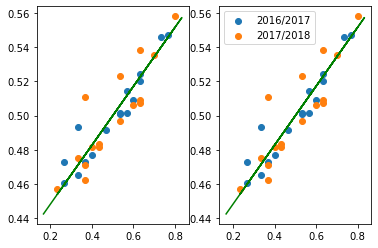

In [108]:
table_concat = pd.concat([table_2016_2017, table_2017_2018, table_2018_2019])

f, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(table_2016_2017["W_ratio"], table_2016_2017["pyth_classic"], label="2016/2017")
ax1.scatter(table_2017_2018["W_ratio"], table_2017_2018["pyth_classic"], label="2017/2018")
m1, b1  = np.polyfit(table_concat["W_ratio"], table_concat["pyth_classic"], 1)
ax1.plot(table_concat["W_ratio"], m1 * table_concat["W_ratio"] + b1, color="green")

ax2.scatter(table_2016_2017["W_ratio"], table_2016_2017["pyth_el"], label="2016/2017")
ax2.scatter(table_2017_2018["W_ratio"], table_2017_2018["pyth_el"], label="2017/2018")
m1, b1  = np.polyfit(table_concat["W_ratio"], table_concat["pyth_el"], 1)
plt.plot(table_concat["W_ratio"], m1 * table_concat["W_ratio"] + b1, color="green")

plt.legend()

In [109]:
table_concat["W_ratio"].corr(table_concat["pyth_el"])

0.9383285613149113

In [110]:
table_concat

,Team,Score,Opponent_Score,Win,count,Season,W_ratio,pyth_classic,pyth_el
0,Real Madrid,2585,2353,23,30,2016/17,0.766667,0.546879,0.546879
1,CSKA Moscow,2619,2387,22,30,2016/17,0.733333,0.546245,0.546245
2,Olympiacos Piraeus,2338,2227,19,30,2016/17,0.633333,0.524301,0.524301
3,Panathinaikos Superfoods Athens,2326,2234,19,30,2016/17,0.633333,0.520167,0.520167
4,Fenerbahce Istanbul,2286,2244,18,30,2016/17,0.600000,0.509271,0.509271
5,Anadolu Efes Istanbul,2521,2512,17,30,2016/17,0.566667,0.501788,0.501788
6,Baskonia Vitoria Gasteiz,2445,2376,17,30,2016/17,0.566667,0.514309,0.514309
7,Crvena Zvezda mts Belgrade,2209,2204,16,30,2016/17,0.533333,0.501133,0.501133
8,Darussafaka Dogus Istanbul,2373,2366,16,30,2016/17,0.533333,0.501477,0.501477
9,Zalgiris Kaunas,2350,2391,14,30,2016/17,0.466667,0.491353,0.491353


In [111]:
from scipy.optimize import fmin_l_bfgs_b

In [112]:
def pyth_fun(x, t):
    x = x[0]
    return np.sum((t["W_ratio"] - t["Score"] ** x / (t["Score"] ** x + t["Opponent_Score"] ** x)) ** 2)

In [129]:
res = []
for x_ in np.arange(-15, 15, 0.1):
    res.append(pyth_fun([x_], table_2020_2021))

'2.0999999999999375 at 0.4635409933171141'

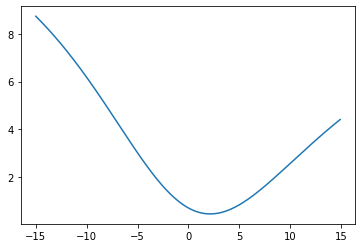

In [130]:
plt.plot(np.arange(-15, 15, 0.1), res)
f"{np.arange(-15, 15, 0.1)[np.argmin(res)]} at {min(res)}"

In [131]:
x_, f, d = fmin_l_bfgs_b(func=pyth_fun, args=(table_2020_2021,), x0=np.array([2]), approx_grad=True)

In [132]:
x_

array([2.13204487])

In [15]:
table_2018_2019 = output_table(games, season="2018/19")

In [28]:
x_, f, d = fmin_l_bfgs_b(func=pyth_fun, args=(table_2018_2019,), x0=np.array([2]), approx_grad=True)

In [29]:
x_

array([8.4385313])

In [141]:
table_2016_2017_half = output_table(games, season="2016/17", round_=15)

In [142]:
table_2016_2017_half

,Team,Score,Opponent_Score,Win,count,Season,W_ratio,pyth_classic,pyth_el
0,CSKA Moscow,1330,1231,12,15,2016/17,0.800000,0.538599,0.538599
1,Baskonia Vitoria Gasteiz,1204,1157,10,15,2016/17,0.666667,0.519899,0.519899
2,Olympiacos Piraeus,1179,1113,10,15,2016/17,0.666667,0.528772,0.528772
3,Real Madrid,1304,1204,10,15,2016/17,0.666667,0.539809,0.539809
4,Fenerbahce Istanbul,1150,1148,9,15,2016/17,0.600000,0.500870,0.500870
5,Panathinaikos Superfoods Athens,1187,1134,9,15,2016/17,0.600000,0.522823,0.522823
6,Darussafaka Dogus Istanbul,1171,1173,8,15,2016/17,0.533333,0.499147,0.499147
7,Anadolu Efes Istanbul,1264,1277,7,15,2016/17,0.466667,0.494884,0.494884
8,Crvena Zvezda mts Belgrade,1115,1117,7,15,2016/17,0.466667,0.499104,0.499104
9,FC Barcelona Lassa,1082,1118,7,15,2016/17,0.466667,0.483641,0.483641


In [143]:
table_2016_2017

,Team,Score,Opponent_Score,Win,count,Season,W_ratio,pyth_classic,pyth_el
0,Real Madrid,2585,2353,23,30,2016/17,0.766667,0.546879,0.546879
1,CSKA Moscow,2619,2387,22,30,2016/17,0.733333,0.546245,0.546245
2,Olympiacos Piraeus,2338,2227,19,30,2016/17,0.633333,0.524301,0.524301
3,Panathinaikos Superfoods Athens,2326,2234,19,30,2016/17,0.633333,0.520167,0.520167
4,Fenerbahce Istanbul,2286,2244,18,30,2016/17,0.600000,0.509271,0.509271
5,Anadolu Efes Istanbul,2521,2512,17,30,2016/17,0.566667,0.501788,0.501788
6,Baskonia Vitoria Gasteiz,2445,2376,17,30,2016/17,0.566667,0.514309,0.514309
7,Crvena Zvezda mts Belgrade,2209,2204,16,30,2016/17,0.533333,0.501133,0.501133
8,Darussafaka Dogus Istanbul,2373,2366,16,30,2016/17,0.533333,0.501477,0.501477
9,Zalgiris Kaunas,2350,2391,14,30,2016/17,0.466667,0.491353,0.491353
